#Project 6 - R
###Intro to Data Science
######*Chris Nolan*

In this problem, you will work with the loans_training and loans_test datasets found here: https://github.com/bforoura/IDS/tree/main/HW6Links to an external site.

In [1]:
# Let's read in the data file

library(readr)
loan_training <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv", show_col_types = FALSE)
loan_test <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW6/Loans_Test.csv", show_col_types = FALSE)

cat("Summary of Loan_Training")
summary(loan_training)

cat("\nSummary of Loan_Test")
summary(loan_test)

head(loan_training,10)

Summary of Loan_Training

  Approval       Debt-to-Income Ratio   FICO Score    Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :372.0   Min.   :  500  
 FALSE:24934     1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000  
 TRUE :24764     Median :0.1600       Median :684.0   Median :11000  
                 Mean   :0.1831       Mean   :672.3   Mean   :13413  
                 3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000  
                 Max.   :1.0500       Max.   :866.0   Max.   :42000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6036  
 3rd Qu.: 8550  
 Max.   :18900  


Summary of Loan_Test

  Approval       Debt-to-Income Ratio   FICO Score    Request Amount 
 Mode :logical   Min.   :0.0000       Min.   :372.0   Min.   :  500  
 FALSE:24934     1st Qu.:0.0900       1st Qu.:647.0   1st Qu.: 6000  
 TRUE :24764     Median :0.1600       Median :684.0   Median :11000  
                 Mean   :0.1831       Mean   :672.3   Mean   :13413  
                 3rd Qu.:0.2400       3rd Qu.:714.0   3rd Qu.:19000  
                 Max.   :1.0500       Max.   :866.0   Max.   :42000  
    Interest    
 Min.   :  225  
 1st Qu.: 2700  
 Median : 4950  
 Mean   : 6036  
 3rd Qu.: 8550  
 Max.   :18900  

Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0,413,2000,900
FALSE,0,449,1000,450
FALSE,0,454,6000,2700
FALSE,0,456,1000,450
FALSE,0,457,1000,450
FALSE,0,457,8000,3600
FALSE,0,459,8000,3600
FALSE,0,461,500,225
FALSE,0,461,6000,2700


1.Create a CART model using the training data set that predicts Approval using Debt-to-Income Ratio, FICO Score, etc. Visualize the decision tree and Describe the first few splits in the decision tree.

In [2]:
install.packages("C50")
library(C50)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘Cubist’, ‘partykit’




In [5]:
#Classification with Decision Trees

#Seperate the input from the output for the model
input <- data.frame(loan_training$'Debt-to-Income Ratio',loan_training$'FICO Score',loan_training$'Request Amount',loan_training$'Interest')
loan_training$Approval <- factor(loan_training$Approval)

summary(input)

summary(loan_training$Approval)

 loan_training..Debt.to.Income.Ratio. loan_training..FICO.Score.
 Min.   :0.0000                       Min.   :372.0             
 1st Qu.:0.0900                       1st Qu.:647.0             
 Median :0.1600                       Median :684.0             
 Mean   :0.1831                       Mean   :672.3             
 3rd Qu.:0.2400                       3rd Qu.:714.0             
 Max.   :1.0500                       Max.   :866.0             
 loan_training..Request.Amount. loan_training.Interest
 Min.   :  500                  Min.   :  225         
 1st Qu.: 6000                  1st Qu.: 2700         
 Median :11000                  Median : 4950         
 Mean   :13413                  Mean   : 6036         
 3rd Qu.:19000                  3rd Qu.: 8550         
 Max.   :42000                  Max.   :18900         

FALSE  TRUE 
24934 24764

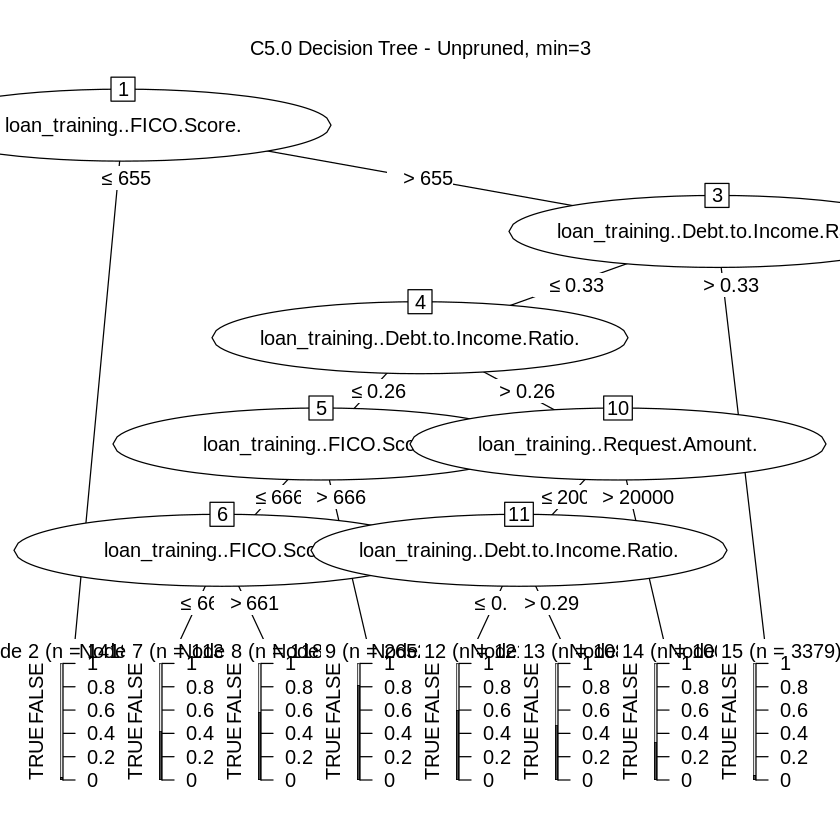

In [7]:
#Let’s build an unpruned decision tree and plot it (Model 1)

# see https://www.rdocumentation.org/packages/C50/versions/0.1.8/topics/C5.0Control
model1 <- C5.0(input, loan_training$Approval, control = C5.0Control(noGlobalPruning = TRUE, minCases=1000))
plot(model1, main="C5.0 Decision Tree - Unpruned, min=3")

In the C5.0 model above the first step in the tree is to see if the FICO Score is greater than 655. If that is true then the model checks Debt to income ratio and if that is less than or equal to 0.33 then the model compares debt to income ration once again.

In [15]:
# For decision tree model
library(rpart)
# For data visualization
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



2.Build a C5.0 model using the same predictors and target as in part 1.  This time, specify a minimum of 1000 cases per terminal node. Visualize the decision tree. Describe the first few splits in the decision tree.

n= 49698 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 49698 24764 FALSE (0.50171033 0.49828967)  
  2) loan_training..FICO.Score.< 660.5 15481   727 FALSE (0.95303921 0.04696079) *
  3) loan_training..FICO.Score.>=660.5 34217 10180 TRUE (0.29751293 0.70248707)  
    6) loan_training..Debt.to.Income.Ratio.>=0.305 4239   547 FALSE (0.87096013 0.12903987) *
    7) loan_training..Debt.to.Income.Ratio.< 0.305 29978  6488 TRUE (0.21642538 0.78357462) *

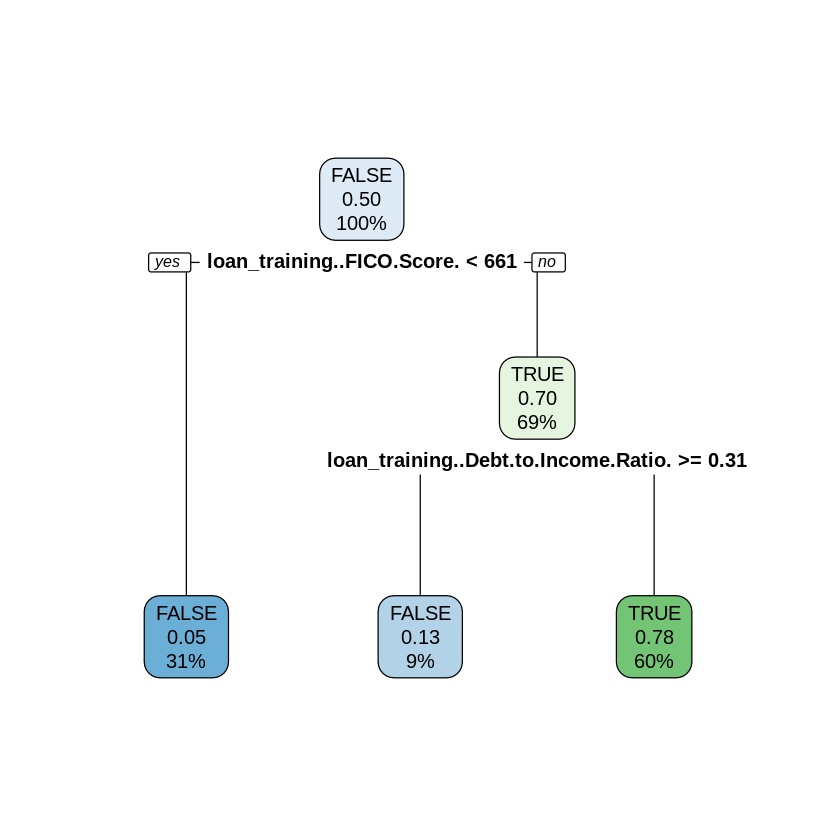

In [16]:
fit.tree = rpart( loan_training$Approval~ ., data=input, method = "class", cp=0.008)
fit.tree
rpart.plot(fit.tree)

First the model compares the FICO Score and if it is greater than 661 it moves onto the debt to income ratio. If this is greater than or equal to 0.31 it perdicts that True is the outcome. Otherwise it will perdict false.

3.How does your C5.0 model compare to your CART model for the loans_training data? Describe the similarities and differences.

The first steps of the models seem to be very similar to eachother. They both follow the same flow of comparing the FICO score than the debt to income raito. While the atributes it compares are similar the values that it chooses to compare are slightly different but they were off my such a small amount you could count them as being the same.